# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake



# **Sales Analysis Report**

---

**Prepared by**: Oluwatomisin Bakare <br/>
**Date**: August 2024 <br/>
**Client**: Sales Team  
**Objective**: To analyze the performance of different sales methods for the new product line and recommend the most effective approach for the future.

---

## **Introduction**

In this report, I present the analysis of three different sales methods utilized by the sales team for promoting the new product line. The objective of this analysis is to identify the method that yields the highest revenue and provides the most value to the business, considering both effectiveness and efficiency.

### **Key Questions Addressed**:
- How many customers were there for each sales approach?
- What does the revenue distribution look like overall and for each method?
- Was there any difference in revenue trends over time for each of the methods?
- Which sales method should be continued based on the data?

# Data Validation And Cleaning

I will first load the data to exam it before initial analysis and ensure all required data has been created and with the required columns.

In [2]:
import pandas as pd
df = pd.read_csv('product_sales.csv')
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


### Checking For Misssing Columns
The data information included in the brief states that the columns should be `'week', 'sales_method', 'customer_id', 'nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits', 'state'` . So let's check for missing **columns.**

In [11]:
required_columns = [
    'week', 'sales_method', 'customer_id', 'nb_sold', 'revenue', 
    'years_as_customer', 'nb_site_visits', 'state'
]
current_columns = df.columns.tolist()

missing_columns = [col for col in required_columns if col not in current_columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("No Missing Columns")

No Missing Columns


It is confirmed there are **No Missing Columns** in the dataset

### Handling Missing Data 
Now, we have to check for missing data keeping in mind null values or unusual entries like dashes ('-') or text like 'missing'.

In [7]:
# For null values
missing_data = df.isnull().sum()
print(missing_data)

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64


With only 7% of revenue data in revnue column is missing, dropping rows would reduce the dataset unnecessarily. Filling missing values with the mean retains the dataset's size and keeps the central tendency intact, ensuring the analysis remains accurate without significant bias.



In [13]:
df['revenue'].fillna(df['revenue'].mean(), inplace=True)
df['revenue'] = df['revenue'].round(2)
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,93.93,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,93.93,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [8]:

# For the unconventional entries
for column in df.columns:
    dash_count = df[column].eq('-').sum()
    missing_count = df[column].eq('missing').sum()
    print(f"Column: {column}")
    print(f"Number of '-' in {column}: {dash_count}")
    print(f"Number of 'missing' in {column}: {missing_count}")

Column: week
Number of '-' in week: 0
Number of 'missing' in week: 0
Column: sales_method
Number of '-' in sales_method: 0
Number of 'missing' in sales_method: 0
Column: customer_id
Number of '-' in customer_id: 0
Number of 'missing' in customer_id: 0
Column: nb_sold
Number of '-' in nb_sold: 0
Number of 'missing' in nb_sold: 0
Column: revenue
Number of '-' in revenue: 0
Number of 'missing' in revenue: 0
Column: years_as_customer
Number of '-' in years_as_customer: 0
Number of 'missing' in years_as_customer: 0
Column: nb_site_visits
Number of '-' in nb_site_visits: 0
Number of 'missing' in nb_site_visits: 0
Column: state
Number of '-' in state: 0
Number of 'missing' in state: 0


There is currently no missing data the dataset.

### Ensuring The Correct Datatypes

In [14]:
df.info

<bound method DataFrame.info of        week  sales_method  ... nb_site_visits          state
0         2         Email  ...             24        Arizona
1         6  Email + Call  ...             28         Kansas
2         5          Call  ...             26      Wisconsin
3         4         Email  ...             25        Indiana
4         3         Email  ...             28       Illinois
...     ...           ...  ...            ...            ...
14995     4          Call  ...             22   Pennsylvania
14996     5          Call  ...             27         Kansas
14997     1          Call  ...             22  West Virginia
14998     6          Call  ...             27     New Jersey
14999     5  Email + Call  ...             25       Illinois

[15000 rows x 8 columns]>

In [15]:
print(df.dtypes)

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object


All datatypes as shown here are in accordance to the data information provided in the brief, all except the `week` column.
Let's convert this to the proper datetime format

In [16]:
df['week'] = pd.to_datetime(df['week'])


In [17]:
print(df.dtypes)

week                 datetime64[ns]
sales_method                 object
customer_id                  object
nb_sold                       int64
revenue                     float64
years_as_customer             int64
nb_site_visits                int64
state                        object
dtype: object


### Checking For Duplicates

In [18]:
duplicates = df.duplicated()
print(duplicates.sum()) 

0


It's confirmed that there were no duplicates in the dataset

In [19]:
print(df.describe())

            nb_sold       revenue  years_as_customer  nb_site_visits
count  15000.000000  15000.000000       15000.000000    15000.000000
mean      10.084667     93.934589           4.965933       24.990867
std        1.812213     45.705474           5.044952        3.500914
min        7.000000     32.540000           0.000000       12.000000
25%        9.000000     53.040000           1.000000       23.000000
50%       10.000000     91.865000           3.000000       25.000000
75%       11.000000    106.070000           7.000000       27.000000
max       16.000000    238.320000          63.000000       41.000000


### Clean Categorical and Text Data by Manipulating Strings

In [21]:
print(df['sales_method'].unique())

['Email' 'Email + Call' 'Call' 'em + call' 'email']


The `sales_method` column show inconsistent unique input. I'll correct this by conveting them to the appropriate text data

In [22]:
df['sales_method'] = df['sales_method'].str.lower()

df['sales_method'] = df['sales_method'].replace({
    'email + call': 'email & call',
    'em + call': 'email & call',
    'email': 'email',
    'call': 'call'
})

print(df['sales_method'].unique())


['email' 'email & call' 'call']


In [10]:
# Check for inconsistent categories in the 'state' column
print(df['state'].unique())


['arizona' 'kansas' 'wisconsin' 'indiana' 'illinois' 'mississippi'
 'georgia' 'oklahoma' 'massachusetts' 'missouri' 'texas' 'new york'
 'maryland' 'california' 'tennessee' 'pennsylvania' 'north dakota'
 'florida' 'michigan' 'north carolina' 'hawaii' 'colorado' 'louisiana'
 'virginia' 'new mexico' 'arkansas' 'alaska' 'oregon' 'new hampshire'
 'ohio' 'new jersey' 'connecticut' 'iowa' 'montana' 'washington'
 'kentucky' 'alabama' 'nebraska' 'south carolina' 'minnesota'
 'south dakota' 'delaware' 'maine' 'utah' 'west virginia' 'vermont'
 'rhode island' 'nevada' 'idaho' 'wyoming']


There seems to be no issues or inconsistent values in the text column `state`.
Now let's check for negative values in the numerical column `revenue` and `nb_sold`

In [12]:
# Identify rows where 'revenue' is negative
negative_revenue = df[df['revenue'] < 0]
print(f"Number of rows with negative revenue: {len(negative_revenue)}")

# Identify rows where 'nb_sold' is non-positive (0 or negative)
non_positive_nb_sold = df[df['nb_sold'] <= 0]
print(f"Number of rows with non-positive nb_sold: {len(non_positive_nb_sold)}")


Number of rows with negative revenue: 0
Number of rows with non-positive nb_sold: 0


## Exploratory Data Analysis
Now that the data is all clean, we can start some explortory Data Anlaysis

### How many customers were there for each approach?


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns


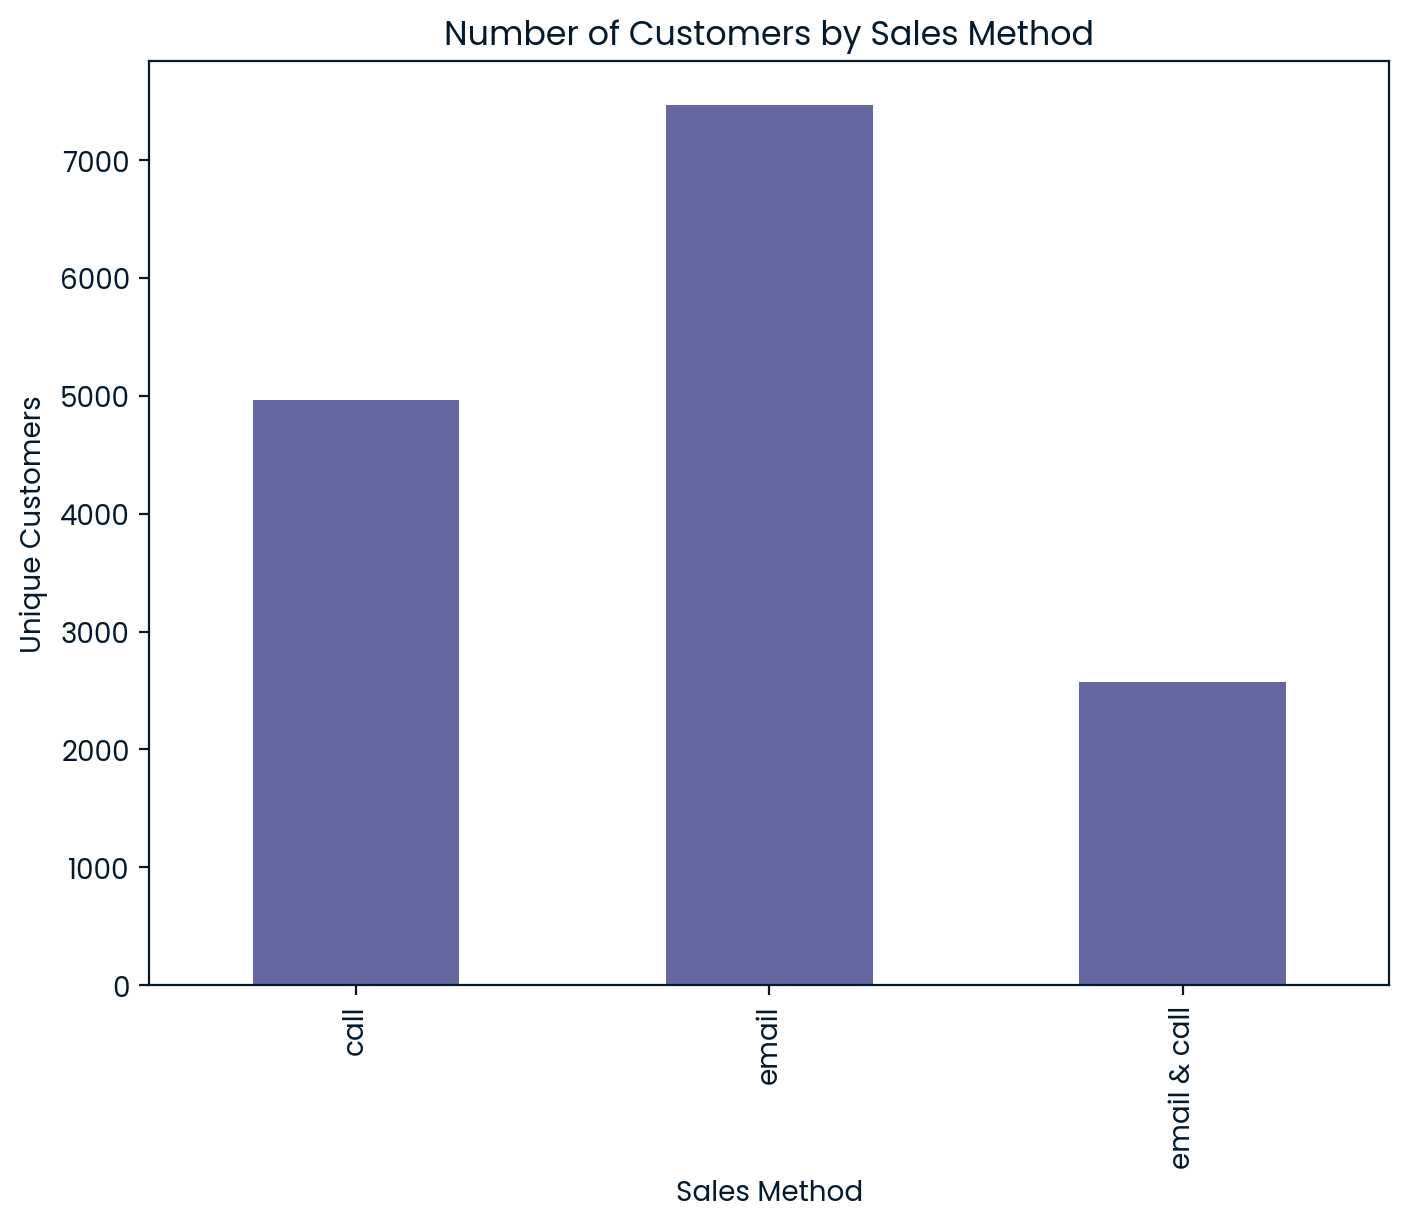

In [24]:
df.groupby('sales_method')['customer_id'].nunique().plot(kind='bar', figsize=(8, 6))
plt.title('Number of Customers by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Unique Customers')
plt.show()


**Insight**: The email-only method attracted the most customers with minimal effort. <br/>
**Recommendation**: Continue using the email-only method as a primary outreach strategy for maximum **efficiency.**

### What does the spread of the revenue look like overall? And for each method?

Overall Revenue Distribution and Revenue by Sales Method

<AxesSubplot: xlabel='revenue', ylabel='Count'>

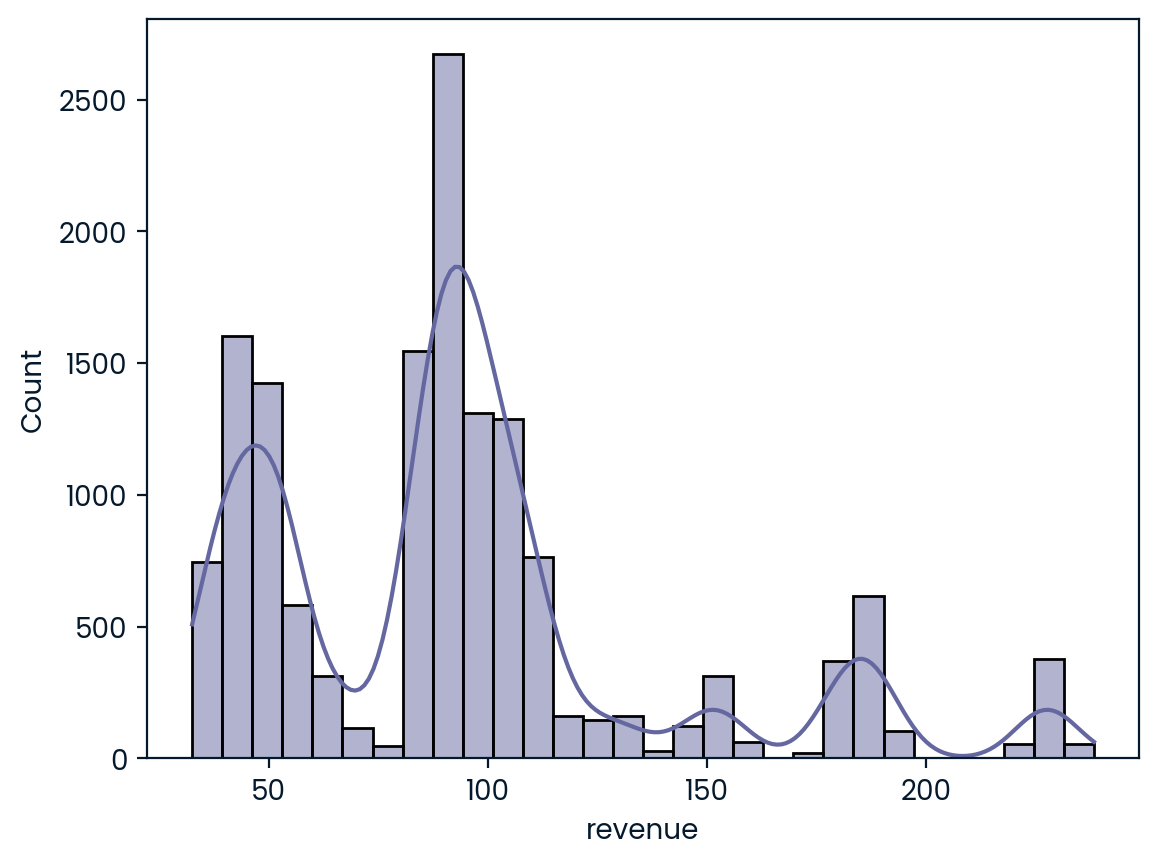

In [25]:
sns.histplot(df['revenue'], bins=30, kde=True)


<AxesSubplot: xlabel='sales_method', ylabel='revenue'>

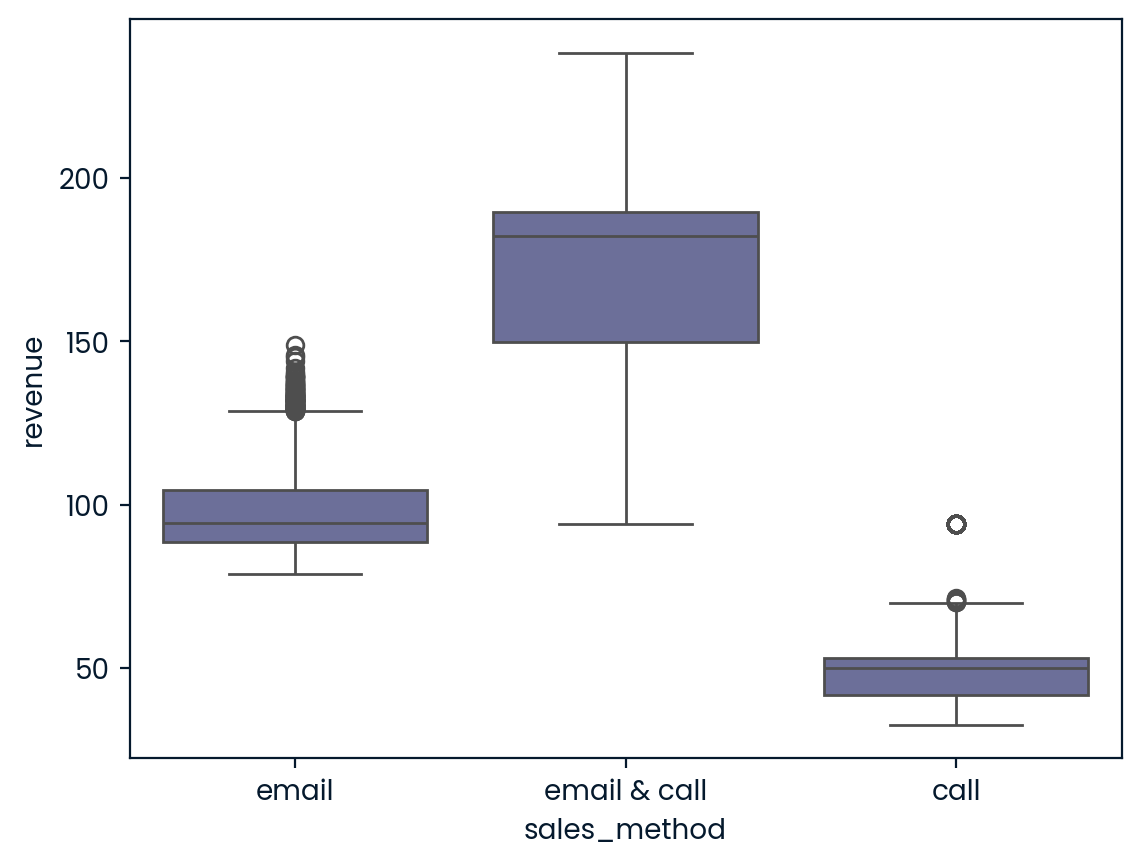

In [26]:
sns.boxplot(x='sales_method', y='revenue', data=df)


**Insight**: The "email & call" method generated the highest median revenue. <br/>
**Recommendation**: Prioritize the "email & call" method for high-value leads, balancing higher returns with moderate effort

### Was there any difference in revenue over time for each of the methods?


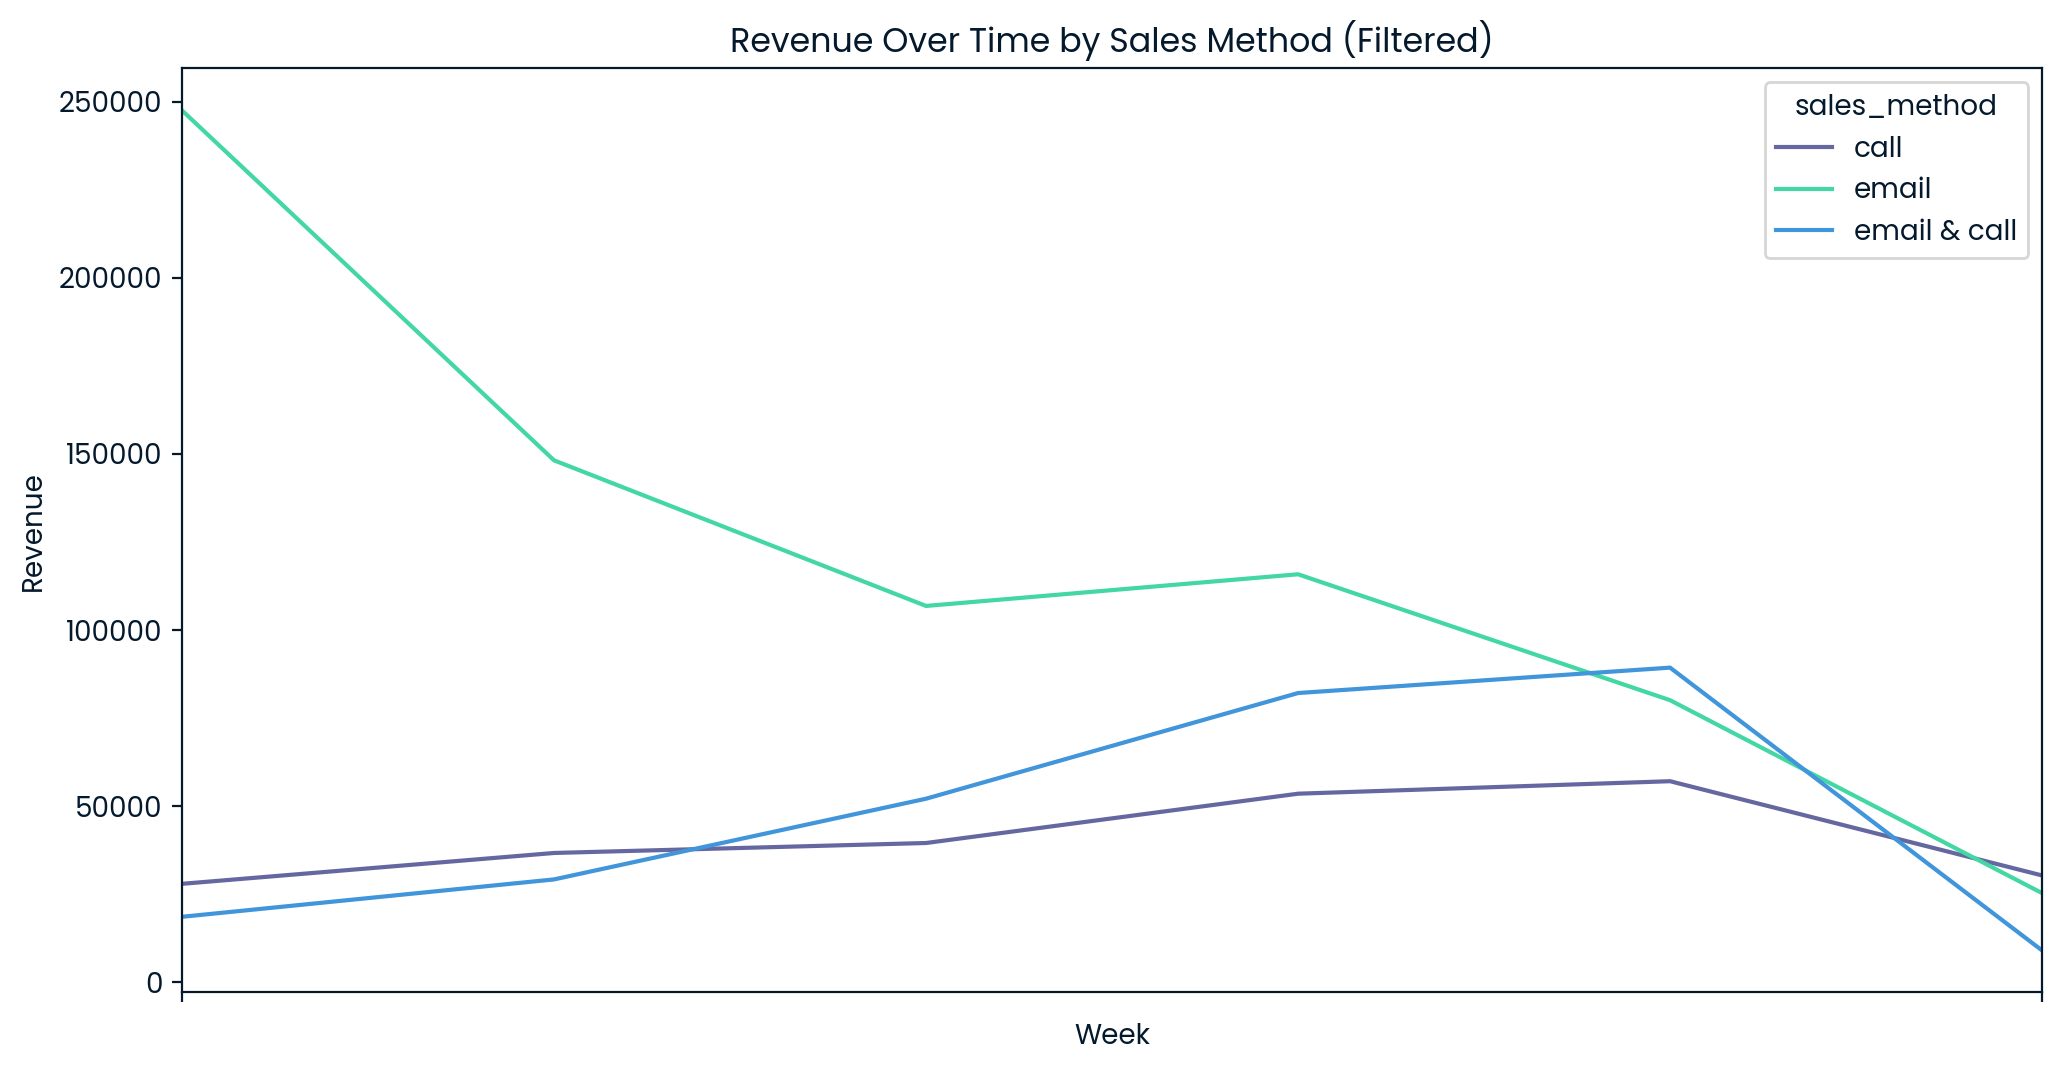

In [27]:
df_filtered = df[df['revenue'] < df['revenue'].quantile(0.95)]  
df_filtered.groupby(['week', 'sales_method'])['revenue'].sum().unstack().plot(figsize=(12, 6))
plt.title('Revenue Over Time by Sales Method (Filtered)')
plt.xlabel('Week')
plt.ylabel('Revenue')
plt.show()


**Insight**: The "call" method saw initial high revenue but was not sustainable, while "email & call" showed consistent growth. <br/>
**Recommendation**: Use the "call" method for short-term, high-priority campaigns, but focus on "email & call" for long-term revenue growth.

### Based on the data, which method would you recommend we continue to use?

**Email-only**: Best for broad customer reach with minimal effort. Continue using this method for general outreach and maintaining customer engagement with low-resource investment. <br/>
**Email & Call**: Best for driving higher revenue with moderate effort. Use this for high-value leads where the combination of email and a brief call can maximize returns without overwhelming the sales team.<br/>
**Call-only**: Best for high-priority, short-term campaigns where a more direct approach is necessary, but not ideal for long-term, resource-efficient strategies.


# Metric Recommendation: Average Revenue per Sales Method
**<br/>**
To strategically optimize our sales efforts, I recommend tracking the Average Revenue per Sales Method. This metric highlights which approach generates the most revenue on average, guiding our focus towards the most effective strategies.

In [28]:
avg_revenue_per_method = df.groupby('sales_method')['revenue'].mean()
avg_revenue_df = avg_revenue_per_method.reset_index()
avg_revenue_df.columns = ['Sales Method', 'Average Revenue']
print(avg_revenue_df)

   Sales Method  Average Revenue
0          call        49.287549
1         email        96.894689
2  email & call       171.476773


## Monitoring Plan
I suggest that we monitor this metric on a weekly or monthly basis. Regular tracking will enable us to:

Identify trends and adjust our strategies to focus on the most successful methods. <br/>
If the "Email & Call" method continues to deliver significantly higher revenue, we may want to invest more in this approach, even though it requires more effort. <br/>
On the other hand, if the simpler "Email" method shows consistently strong performance, it could present a more efficient option for reaching customers.<br/>
By monitoring these averages over time, we can ensure that our resources are being used effectively to maximize revenue and sustain growth.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation